# Analysis

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import shutil
import numpy as np
import bluepy as bp
from pathlib import Path
import pandas as pd
import os

import spikeinterface

import spikeinterface.full as si  # import core only
import spikeinterface.extractors as se
import spikeinterface.sorters as ss
import spikeinterface.comparison as sc
import spikeinterface.widgets as sw
import spikeinterface.qualitymetrics as sqm
import spikeinterface.postprocessing as spost
from spikeinterface import WaveformExtractor

from spikeinterface.comparison import GroundTruthStudy
ss.Kilosort3Sorter.set_kilosort3_path('./sorters_packages/Kilosort')
ss.IronClustSorter.set_ironclust_path('./sorters_packages/ironclust')
ss.HDSortSorter.set_hdsort_path('./sorters_packages/HDsort')

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['font.size'] = '9'

Setting KILOSORT3_PATH environment variable for subprocess calls to: /gpfs/bbp.cscs.ch/project/proj68/home/laquitai/spike-sorting/sorters_packages/Kilosort
Setting IRONCLUST_PATH environment variable for subprocess calls to: /gpfs/bbp.cscs.ch/project/proj68/home/laquitai/spike-sorting/sorters_packages/ironclust
Setting HDSORT_PATH environment variable for subprocess calls to: ./sorters_packages/HDsort


## Set paths

In [2]:
outpath= '../../../scratch/imbeni/sorting/output/0_silico/'
name = 'Hex0_4s_reyes128'
simpath = '/gpfs/bbp.cscs.ch/project/proj68/scratch/tharayil/spikeDetection/1f039ca3-7c27-4e0f-866e-e001f95620f4/0'
out = outpath + name +'/' + name
outrec = out + '_rec'
outsort = out + '_true_spikes'

In [14]:
sim =  bp.Simulation(simpath + '/BlueConfig')
c = sim.circuit

Invalid absolute path: /gpfs/bbp.cscs.ch/project/proj45/scratch/S1full/METypes
Have keys ({'LFPWeightsPath', 'KeepModelData'}) that are not defined for section: Run


In [15]:
study_folder = out + '_study'

In [16]:
study = GroundTruthStudy(study_folder)

In [17]:
study.scan_folder()

In [18]:
print(dir(study))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_check_rec_name', '_is_scanned', 'aggregate_count_units', 'aggregate_dataframes', 'aggregate_performance_by_unit', 'aggregate_run_times', 'comparisons', 'compute_metrics', 'compute_waveforms', 'computed_names', 'concat_all_snr', 'copy_sortings', 'create', 'exhaustive_gt', 'get_ground_truth', 'get_metrics', 'get_recording', 'get_sorting', 'get_templates', 'get_units_snr', 'get_waveform_extractor', 'rec_names', 'run_comparisons', 'run_sorters', 'scan_folder', 'sorter_names', 'study_folder']


In [19]:
rec = spikeinterface.load_extractor(outrec)

In [20]:
gt_sorting = spikeinterface.load_extractor(outsort)

In [21]:
we_folder = out + '_real' + '_wfs'
we_real = si.extract_waveforms(rec, gt_sorting, we_folder,
                          load_if_exists=False, overwrite=True,
                          ms_before=2, ms_after=2., max_spikes_per_unit=None)
print(we_real)

Setting 'return_scaled' to False
WaveformExtractor: 128 channels - 854 units - 1 segments
  before:40 after:40 n_per_units:None


In [22]:
sorters = [ 'spykingcircus2'] #'kilosort3' 'herdingspikes', 'tridesclous2' ,ironclust', 'hdsort'

In [23]:
for sorter in sorters:
    sorteroutput =  out + str(sorter) 
    we_folder = out + str(sorter) + '_wfs'
    sorting = ss.run_sorter(sorter, recording = rec, output_folder = sorteroutput, 
                                    verbose = True, remove_existing_folder = True, delete_output_folder = False)
    import shutil
    shutil.rmtree(sorteroutput + '_spikes',ignore_errors = True)
    sorting.save(folder = sorteroutput + '_spikes')

    print('Extracting waveforms')
    Path(we_folder).mkdir(parents=True, exist_ok=True)
    we = si.extract_waveforms(rec, sorting, we_folder,
                      load_if_exists=False, overwrite=True,
                      ms_before=2, ms_after=2, max_spikes_per_unit=None, n_jobs = 30, total_memory = '60G')
        

Error running spykingcircus2
Traceback (most recent call last):
  File "/gpfs/bbp.cscs.ch/home/laquitai/spack_install/environments/test_env/.spack-env/._view/jrdt3tmavmwrfadpobleytnu5i5hs56w/lib/python3.9/site-packages/spikeinterface/sorters/basesorter.py", line 225, in run_from_folder
    SorterClass._run_from_folder(output_folder, sorter_params, verbose)
  File "/gpfs/bbp.cscs.ch/home/laquitai/spack_install/environments/test_env/.spack-env/._view/jrdt3tmavmwrfadpobleytnu5i5hs56w/lib/python3.9/site-packages/spikeinterface/sorters/si_based_sorters/spyking_circus2.py", line 44, in _run_from_folder
    assert HAVE_HDBSCAN, 'spykingcircus2 needs hdbscan to be installed'
AssertionError: spykingcircus2 needs hdbscan to be installed



SpikeSortingError: Spike sorting failed. You can inspect the runtime trace in ../../../scratch/imbeni/sorting/output/0_silico/Hex0_4s_reyes128/Hex0_4s_reyes128spykingcircus2/spikeinterface_log.json

In [ ]:
def check_available_sorter_results(out):
    available_sorters = []
    for sorter in ss.available_sorters():
        if os.path.isdir(out + str(sorter) + '_spikes'):
            available_sorters.append(sorter)
    return available_sorters
sorters = check_available_sorter_results(out)
print(sorters)

In [ ]:
sortings = []
for sorter in sorters:
    sort_folder =  out + str(sorter) + '_spikes'
    print(sorter)
    sorting = si.load_extractor(sort_folder)
    sortings.append(sorting)


In [56]:
mcmp = sc.compare_multiple_sorters(
    sorting_list=sortings,
    name_list=sorters,
    verbose=True,
    spiketrain_mode='intersection' # or union
)

mcmp.save_to_folder(out + '_comparison')

Multicomaprison step 1: pairwise comparison
  Comparing: hdsort and herdingspikes
  Comparing: hdsort and ironclust
  Comparing: hdsort and spykingcircus2
  Comparing: hdsort and tridesclous2
  Comparing: herdingspikes and ironclust
  Comparing: herdingspikes and spykingcircus2
  Comparing: herdingspikes and tridesclous2
  Comparing: ironclust and spykingcircus2
  Comparing: ironclust and tridesclous2
  Comparing: spykingcircus2 and tridesclous2
Multicomparison step 2: make graph
Multicomaprison step 3: clean graph
Removed 0 duplicate nodes
Multicomparison step 4: extract agreement from graph


<class 'networkx.utils.decorators.argmap'> compilation 9:5: DeprecationWarning: write_gpickle is deprecated and will be removed in 3.0.Use ``pickle.dump(G, path, protocol)``


In [57]:
totspikes = []
for sorting, sorter in zip(sortings, sorters):
    totspikes.append(sum(sorting.get_total_num_spikes().values()))

In [58]:
sum(gt_sorting.get_total_num_spikes().values())

3180

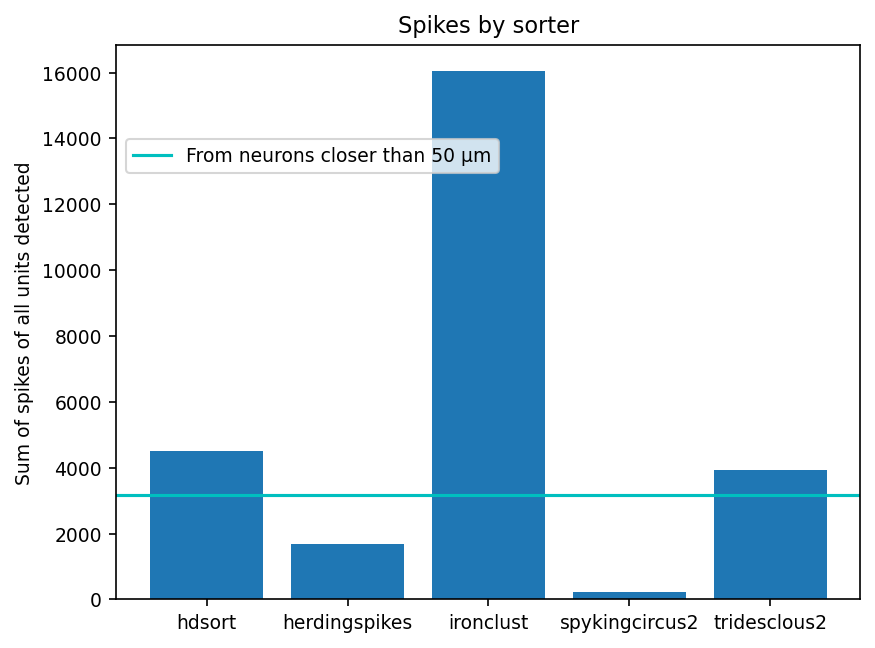

In [59]:
plt.bar(height = totspikes, x = sorters)
plt.axhline(sum(gt_sorting.get_total_num_spikes().values()), c = 'c', label = 'From neurons closer than 50 μm')
plt.ylabel('Sum of spikes of all units detected')
plt.title('Spikes by sorter')
plt.legend(loc='center left', bbox_to_anchor=(0, 0.8))

AgreementSortingExtractor: 2 units - 1 segments - 20.0kHz


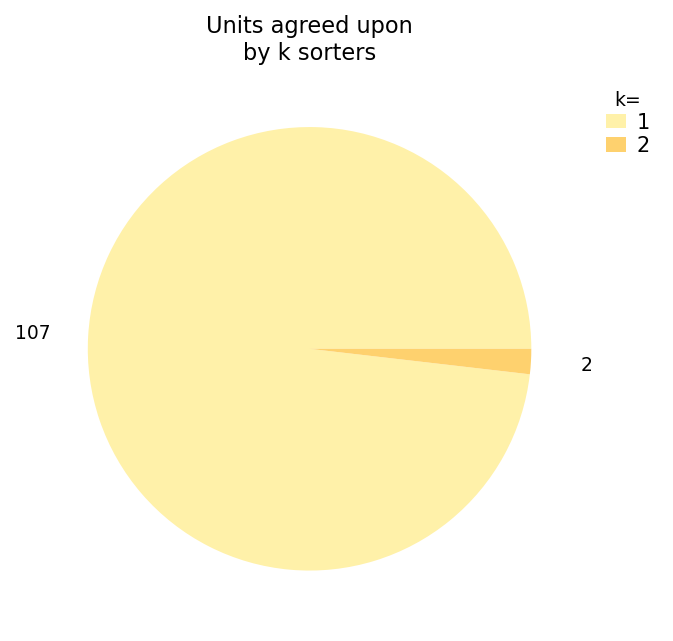

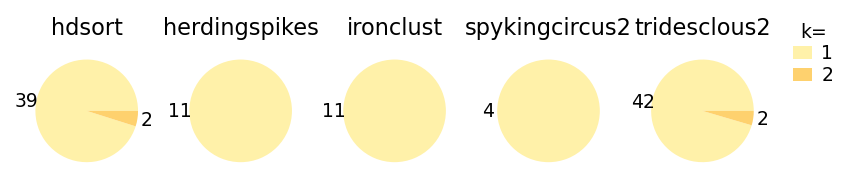

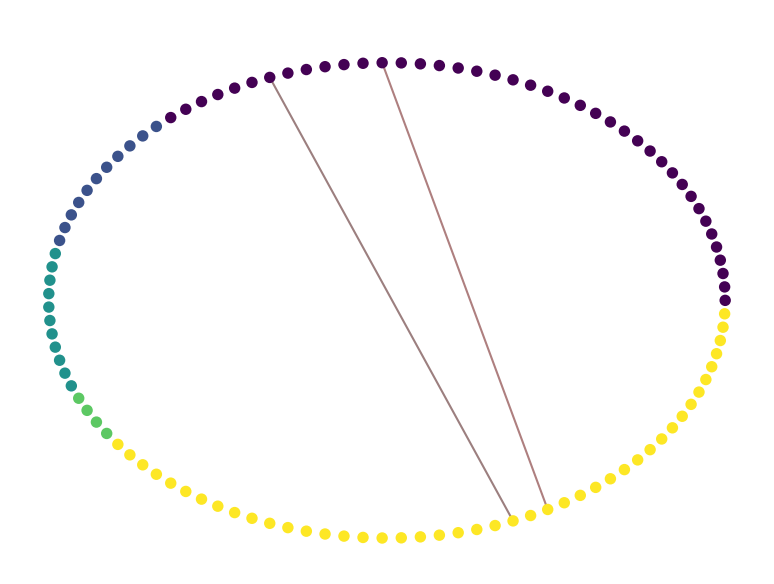

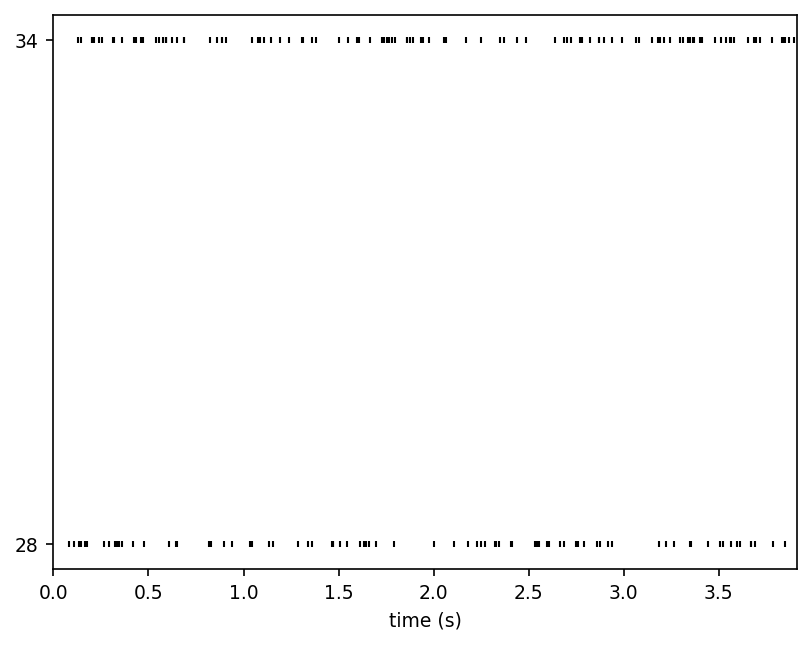

In [60]:
w = sw.plot_multicomp_agreement(mcmp)
w = sw.plot_multicomp_agreement_by_sorter(mcmp)
sw.plot_multicomp_graph(mcmp, draw_labels=False)
agreement_sorting = mcmp.get_agreement_sorting(minimum_agreement_count=2)
print(agreement_sorting)
sw.plot_rasters(agreement_sorting)

In [61]:
dir(agreement_sorting)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_annotations',
 '_check_segment_index',
 '_extra_metadata_from_folder',
 '_extra_metadata_to_folder',
 '_features',
 '_get_file_path',
 '_kwargs',
 '_main_annotations',
 '_main_features',
 '_main_ids',
 '_main_properties',
 '_msc',
 '_preferred_mp_context',
 '_properties',
 '_recording',
 '_sampling_frequency',
 '_save',
 '_sorting_segments',
 'add_sorting_segment',
 'annotate',
 'check_if_dumpable',
 'clone',
 'copy_metadata',
 'dump',
 'dump_to_json',
 'dump_to_pickle',
 'extra_requirements',
 'frame_slice',
 'from_dict',
 'get_all_spike_trains',
 'get_annotation',
 'get_annotation_keys',
 'get_num_segments',
 'get_num

In [62]:
agreement_sorting.get_total_num_spikes()

{28: 81, 34: 109}

In [83]:
we_folder = out + '_consensus' + '_wfs'
we = si.extract_waveforms(rec, agreement_sorting, we_folder,
                          load_if_exists=False, overwrite=True,
                          ms_before=2, ms_after=2., max_spikes_per_unit=None)
print(we)
max_chids = spost.get_template_extremum_channel(we, peak_sign='neg')

Setting 'return_scaled' to False
WaveformExtractor: 128 channels - 2 units - 1 segments
  before:40 after:40 n_per_units:None


(array([202., 158., 117., 125.,  79.,  61.,  37.,  24.,  14.,  11.,  10.,
          3.,   4.,   1.,   0.,   1.,   1.,   2.,   1.,   1.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.25      , 0.48333333, 0.71666667, 0.95      , 1.18333333,
        1.41666667, 1.65      , 1.88333333, 2.11666667, 2.35      ,
        2.58333333, 2.81666667, 3.05      , 3.28333333, 3.51666667,
        3.75      , 3.98333333, 4.21666667, 4.45      , 4.68333333,
        4.91666667, 5.15      , 5.38333333, 5.61666667, 5.85      ,
        6.08333333, 6.31666667, 6.55      , 6.78333333, 7.01666667,
        7.25      ]),
 <BarContainer object of 30 artists>)

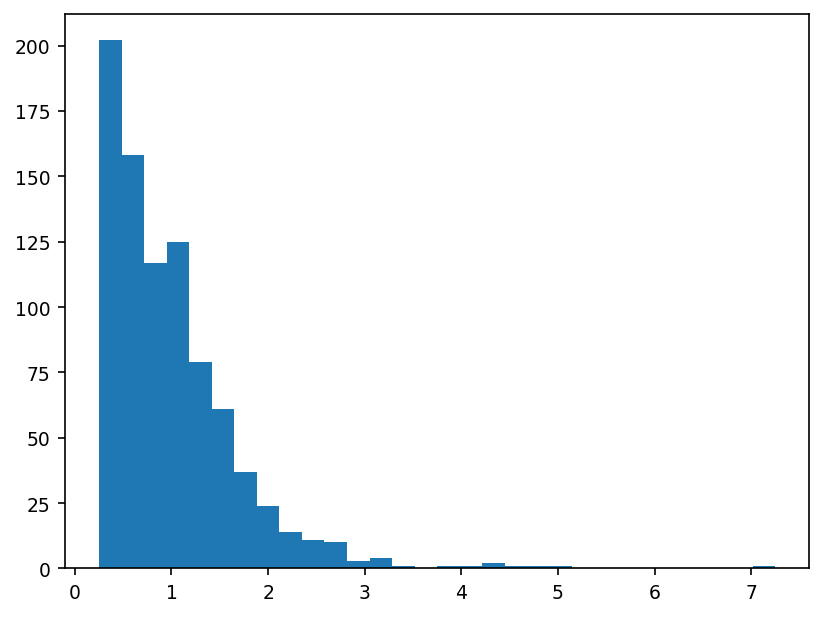

In [63]:
spikes = gt_sorting.get_total_num_spikes() #ignoring the ones in the volume that didnt fire!
plt.hist(np.array(list(spikes.values()))/4, bins = 30)

In [64]:
np.array(spikes.values())

array(dict_values([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 5, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 3, 4, 1, 5, 1, 2, 2, 1, 2, 4, 1, 1, 2, 1, 1, 4, 1, 4, 1, 3, 6, 1, 2, 4, 1, 2, 3, 3, 1, 1, 1, 1, 1, 4, 1, 2, 2, 1, 3, 1, 5, 2, 5, 1, 1, 7, 4, 1, 1, 1, 1, 2, 29, 5, 14, 2, 1, 11, 5, 9, 5, 1, 1, 9, 2, 4, 5, 5, 6, 2, 5, 1, 4, 2, 1, 1, 1, 1, 2, 1, 1, 3, 1, 2, 4, 1, 1, 4, 2, 4, 1, 2, 1, 2, 1, 1, 3, 2, 2, 1, 1, 1, 2, 5, 1, 1, 2, 7, 2, 1, 1, 5, 3, 1, 2, 1, 1, 1, 4, 4, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 13, 2, 1, 1, 1, 2, 3, 1, 3, 2, 3, 2, 1, 5, 3, 5, 1, 1, 3, 1, 1, 6, 1, 1, 18, 5, 13, 3, 1, 15, 1, 1, 1, 3, 4, 2, 4, 1, 1, 6, 2, 3, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 4, 2, 1, 2, 1, 1, 3, 1, 2, 2, 1, 2, 1, 4, 1, 1, 2, 1, 1, 3, 3, 3, 2, 3, 3, 3, 2, 1, 1, 2, 4, 1, 3, 1, 1, 6, 1, 1, 2, 1, 1, 3, 3, 1, 5, 2, 1, 2, 1, 3, 4, 4, 2, 4, 1, 5, 2, 2, 2, 1, 2, 1, 6, 3, 4, 1, 1, 1, 7, 2, 1, 1, 1, 1, 1, 1, 5, 2, 3, 4, 3, 1, 1, 1, 1, 2, 1, 1, 3, 2, 6, 1, 1, 3, 1, 1, 2, 1, 2, 2, 3, 1, 2, 3, 1, 2, 3, 10, 3, 2, 4, 1, 1, 1

In [65]:
comp = sc.compare_sorter_to_ground_truth(gt_sorting, agreement_sorting,'true', 'consensus', delta_time=0.4, exhaustive_gt = True)

 match_score=0.5, well_detected_score=0.8, redundant_score=0.2, overmerged_score=0.2, chance_score=0.1
given that we have way more gids than the units detected, these parameters must be checked and the results explored in more detail

In [66]:
comp.print_performance()

PERFORMANCE (pooled_with_average)
-----------
ACCURACY: 0.0
RECALL: 0.0
PRECISION: 0.0
FALSE DISCOVERY RATE: 0.0
MISS RATE: 0.0



In [67]:
dir(comp)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_compute_labels',
 '_compute_misclassifications',
 '_confusion_matrix',
 '_do_agreement',
 '_do_confusion_matrix',
 '_do_count',
 '_do_matching',
 '_do_score_labels',
 '_labels_st1',
 '_labels_st2',
 '_verbose',
 'agreement_scores',
 'best_match_12',
 'best_match_21',
 'chance_score',
 'count_bad_units',
 'count_false_positive_units',
 'count_overmerged_units',
 'count_redundant_units',
 'count_score',
 'count_well_detected_units',
 'delta_frames',
 'delta_time',
 'event_counts1',
 'event_counts2',
 'exhaustive_gt',
 'get_bad_units',
 'get_confusion_matrix',
 'get_false_positive_units',
 'get_labels1',
 'get_labels2',
 '

In [68]:
comp.get_confusion_matrix()

,28.0,34.0,FN
10250,0,0,1
54138,0,0,1
97717,0,0,1
128161,0,0,1
162868,0,0,1
...,...,...,...
4207582,0,0,3
4209762,0,0,6
4210736,0,0,2
4227733,0,0,4


In [69]:
comp.get_ordered_agreement_scores()

,28,34
3941211,0.096386,0.000000
4157012,0.086420,0.000000
4058924,0.000000,0.054545
3674635,0.000000,0.053571
3624592,0.049383,0.000000
...,...,...
3669233,0.000000,0.000000
3668383,0.000000,0.000000
3666858,0.000000,0.000000
3663522,0.000000,0.000000


In [70]:
comp.count_bad_units()

2

In [71]:
comp.count_false_positive_units()
comp.count_overmerged_units()
comp.count_redundant_units()

0

(array([[72.,  0., 54.,  0.,  3.,  2.,  0.,  3.,  0.,  0.,  1.,  0.,  0.,
          0.,  0.,  0.,  0.,  1.,  0.,  1.],
        [54., 67.,  0., 10.,  0.,  1.,  0.,  2.,  0.,  1.,  0.,  2.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.]]),
 array([0.        , 0.00481928, 0.00963855, 0.01445783, 0.01927711,
        0.02409639, 0.02891566, 0.03373494, 0.03855422, 0.04337349,
        0.04819277, 0.05301205, 0.05783133, 0.0626506 , 0.06746988,
        0.07228916, 0.07710843, 0.08192771, 0.08674699, 0.09156627,
        0.09638554]),
 <a list of 2 BarContainer objects>)

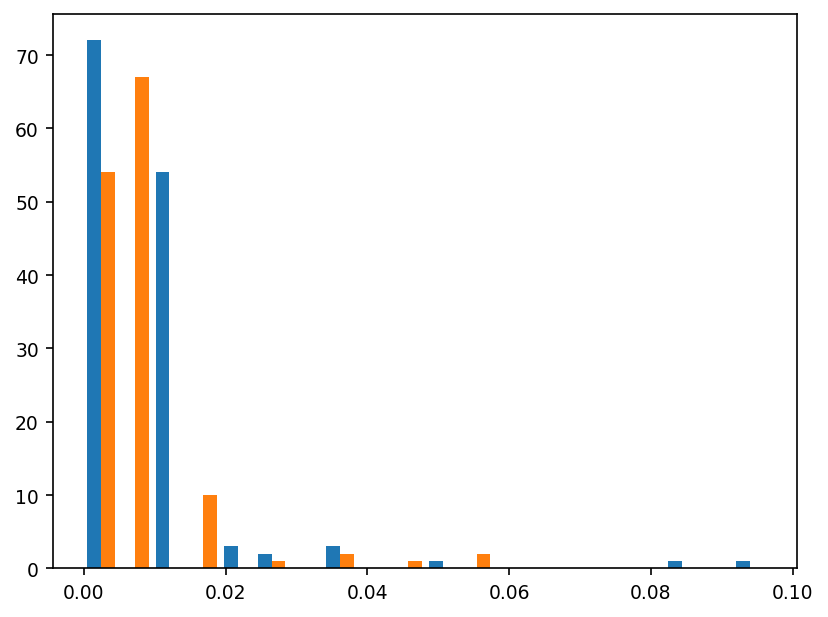

In [72]:
ag_sc = comp.agreement_scores
plt.hist(ag_sc[(ag_sc>0).any(1)], bins = 20)

In [73]:
ag_sc

,28,34
10250,0.012346,0.0
54138,0.000000,0.0
97717,0.000000,0.0
128161,0.000000,0.0
162868,0.000000,0.0
...,...,...
4207039,0.000000,0.0
4207582,0.000000,0.0
4209762,0.000000,0.0
4210736,0.000000,0.0


In [ ]:
# after having computed the agreement scores, we can explore which units were detected, how the clustering performed

In [74]:
agunit = 28
event_count = comp.match_event_count.sort_values(by = agunit, ascending = False)[agunit]
print(event_count)

3941211    8
4157012    7
3624592    4
3967367    3
4084695    3
          ..
2552973    0
2554360    0
2555226    0
2563118    0
4227733    0
Name: 28, Length: 854, dtype: int64


In [75]:
matched_gids_spikes = list(event_count[(event_count>0)].index) # gids with spikes in the spiketrain of the chosen agunit

In [76]:
len(matched_gids_spikes)

65

In [77]:
spikes_sim = sim.spikes.get(gids = matched_gids_spikes)

In [78]:
spikes_sim.value_counts()

2884778    19
2202995    13
4190461    12
4031780    10
2776163    10
           ..
2774398     2
3788802     2
1849961     1
1056421     1
10250       1
Name: gid, Length: 65, dtype: int64

In [79]:
sorting_spikes_from_sim = sim.spikes.get(gids = gt_sorting.get_unit_ids())

In [90]:
# agunit has agreement with these gids, and they have real spikes 
#how many are missed
# where they are!
corresponding_count = pd.concat([event_count, sorting_spikes_from_sim.value_counts()], axis = 1).sort_values(by=agunit, ascending = False).head(10)

In [93]:
corresponding_count['acc'] = corresponding_count[agunit]/corresponding_count['gid']

In [100]:
mostly_detected = list(corresponding_count[(corresponding_count['acc']>0.5)].index)

73


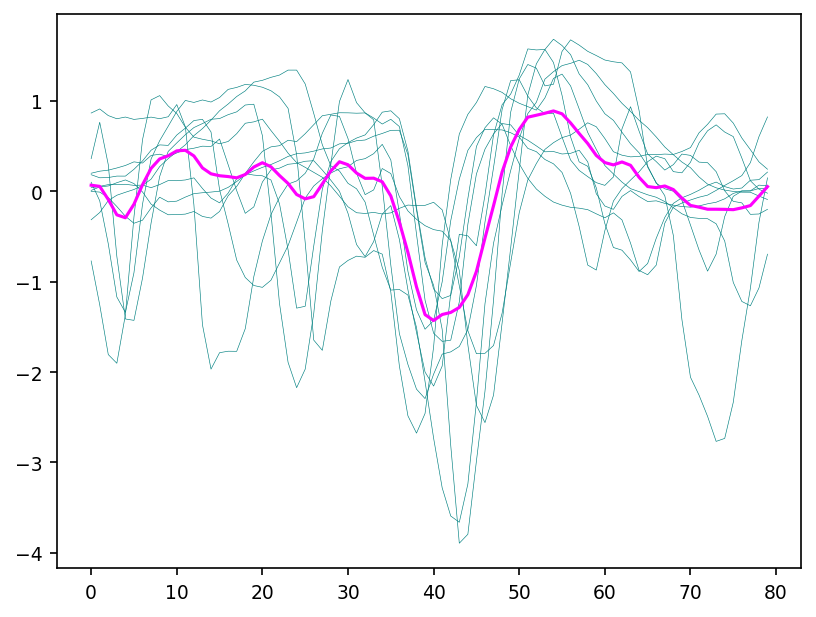

74


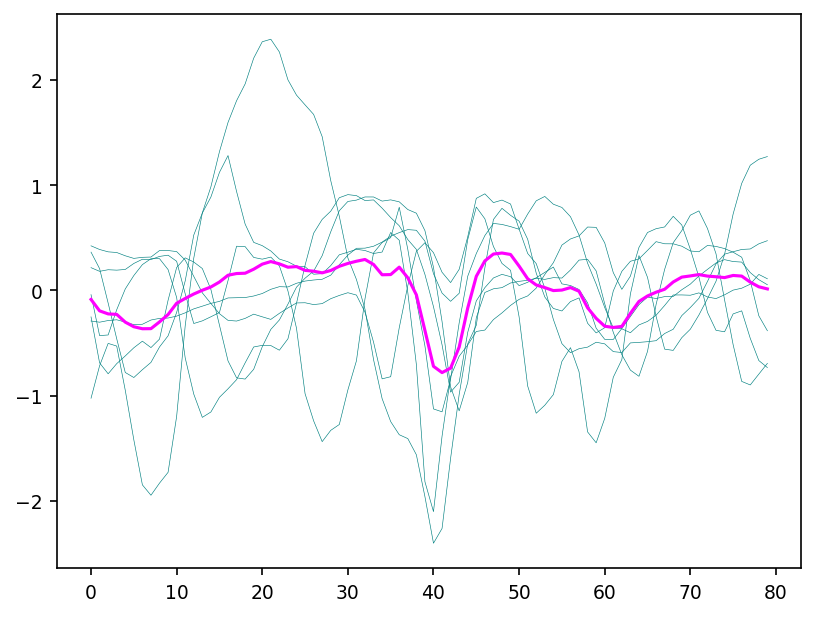

58


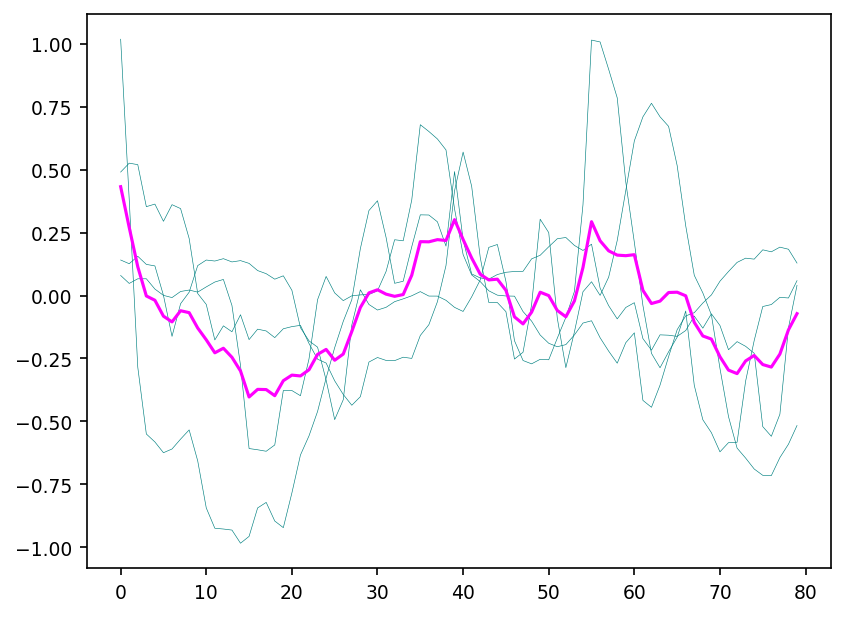

53


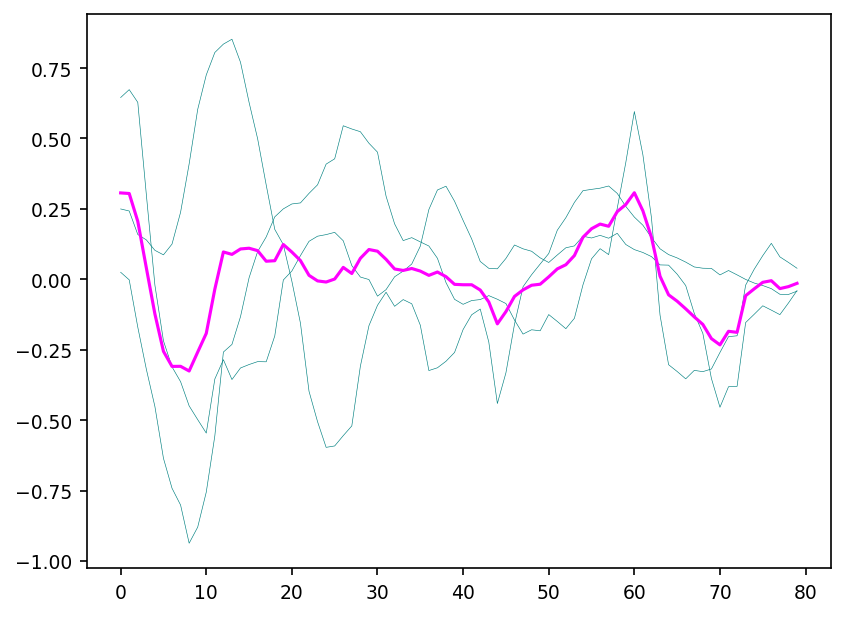

73


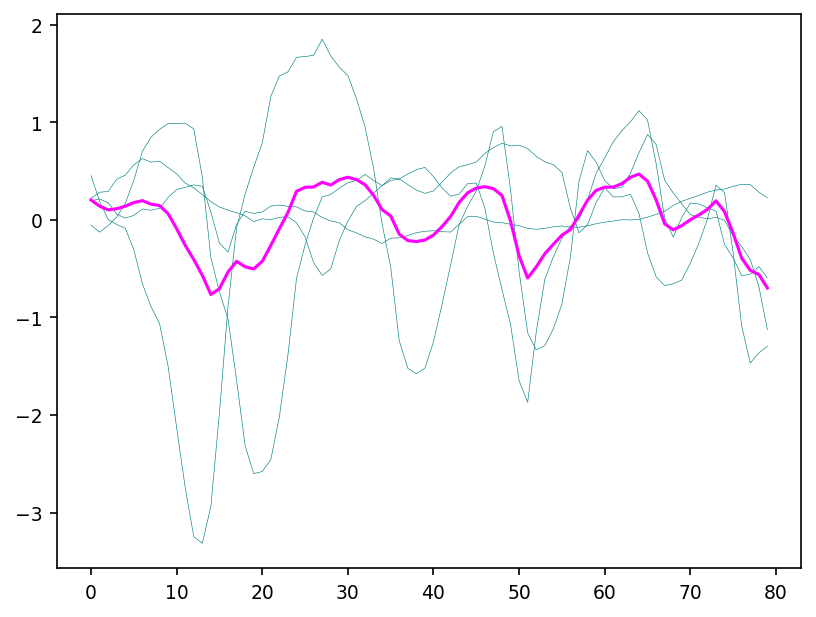

70


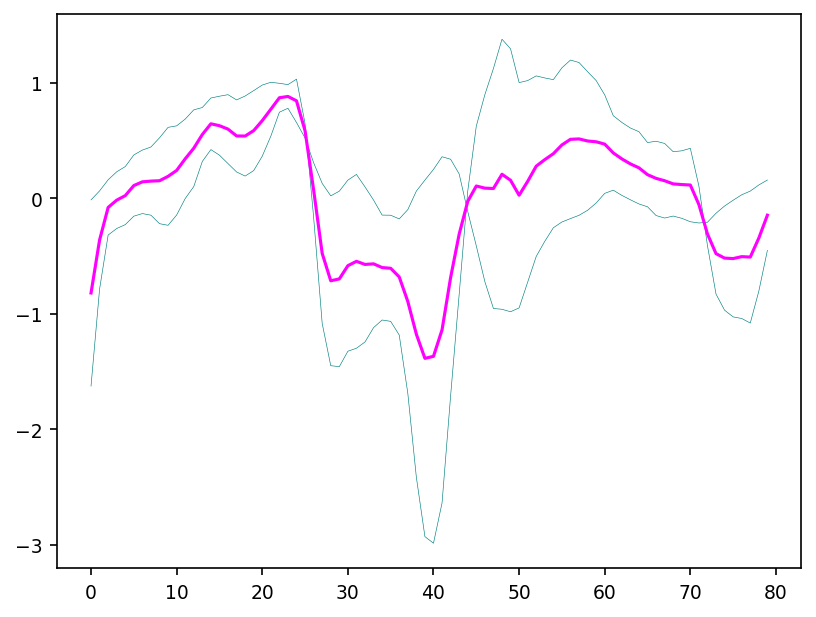

In [103]:
# real waveforms of mostly detected unit
colors = ['Olive', 'Teal', 'Fuchsia']
max_chids = spost.get_template_extremum_channel(we_real, peak_sign= 'both')
for i, unit_id in enumerate(mostly_detected):
    wf = we_real.get_waveforms(unit_id)
    color = colors[1]
    
    idx = int(max_chids[unit_id]) - 64
    print(int(max_chids[unit_id]))
    plt.plot(wf[:, :, idx-1].T, color=color, lw=0.3)
    tmp = we_real.get_template(unit_id)
    plt.plot(tmp[:,idx-1], color = colors[2])
    plt.show()

In [ ]:
# here it would be nice to load the real waveforms

# create new files as average of waveforms for all cells for all channels

In [ ]:
gt_sorting.get_total_num_spikes()

73


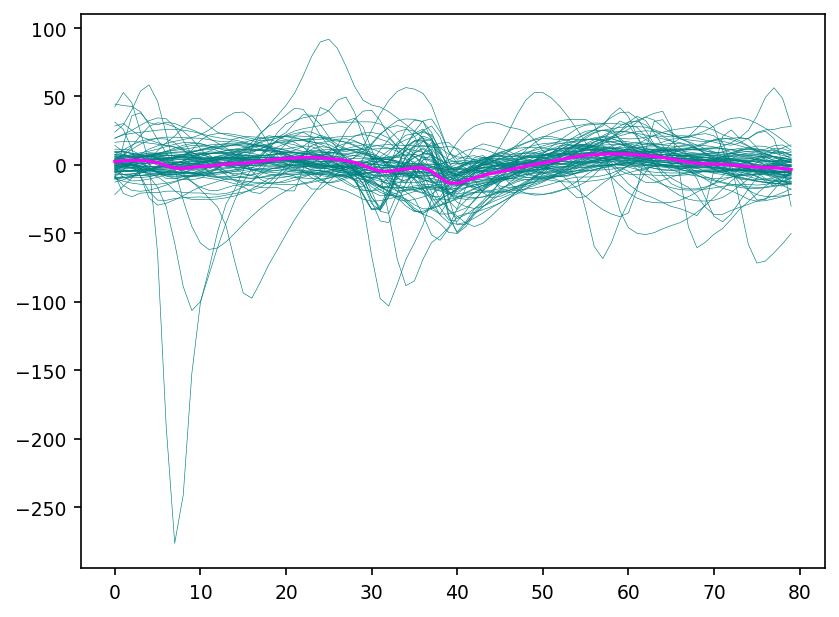

In [87]:
wf = we.get_waveforms(agunit) # to highlight the presence of many neurons
color = 'Teal'

idx = int(max_chids[agunit])
print(idx)
plt.plot(wf[:, :, idx-1].T, color=color, lw=0.3)
tmp = we.get_template(agunit)
plt.plot(tmp[:,idx-1], color = 'Fuchsia')
plt.show()

In [106]:
sqm.compute_snrs(we, peak_sign = 'neg', peak_mode = "extremum")

{28: 8.397479, 34: 7.7723465}

In [ ]:
study.run_comparisons(exhaustive_gt=True)

In [ ]:
for (rec_name, sorter_name), comp in study.comparisons.items():
    print('*' * 10)
    print(rec_name, sorter_name)
    print(comp.count_score)  # raw counting of tp/fp/...
    comp.print_summary()
    
    perf_unit = comp.get_performance(method='by_unit')
    perf_avg = comp.get_performance(method='pooled_with_average')
    
    m = comp.get_confusion_matrix()
    w_comp = sw.plot_agreement_matrix(comp, ordered = True)
    w_comp.ax.set_title(rec_name  + ' - ' + sorter_name)
    w_comp.ax.get_yaxis().set_visible(False)
    w_comp.ax.get_xaxis().set_visible(False)


In [ ]:
dataframes = study.aggregate_dataframes()

##############################################################################
# Pandas dataframes can be nicely displayed as tables in the notebook.

print(dataframes.keys())

##############################################################################

print(dataframes['run_times'])

##############################################################################
# Easy plot with seaborn
# ----------------------
#  
# Seaborn allows to easily plot pandas dataframes. Let’s see some
# examples.

run_times = dataframes['run_times']
fig1, ax1 = plt.subplots()
sns.barplot(data=run_times, x='rec_name', y='run_time', hue='sorter_name', ax=ax1)
ax1.set_title('Run times')

##############################################################################

perfs = dataframes['perf_by_unit']
fig2, ax2 = plt.subplots()
sns.swarmplot(data=perfs, x='sorter_name', y='recall', hue='rec_name', ax=ax2)
ax2.set_title('Recall')
ax2.set_ylim(-0.1, 1.1)

plt.show()

In [ ]:
dataframes

In [ ]:
sw.plot_timeseries(rec0, channel_ids = [64],time_range = (2.796,2.802))

In [ ]:
sw.plot_timeseries(rec0, channel_ids = [65],time_range = (2.775,2.802))

In [ ]:
sw.plot_timeseries(rec0, channel_ids = [68],time_range = (0,4))

In [ ]:
sw.plot_timeseries(rec, channel_ids = np.arange(64,80), time_range = (0,4))
plt.grid()

In [ ]:
sorting_hd = study.get_sorting('hdsort')

In [ ]:
study.compute_waveforms(rec0, ms_before = 2, ms_after = 2)

In [ ]:
we = study.get_waveform_extractor(rec0)
gt = study.get_ground_truth(rec0)

In [ ]:
colors = ['Olive', 'Teal', 'Fuchsia']
max_chids = spost.get_template_extremum_channel(we, peak_sign='neg')
for i, unit_id in enumerate(gt.unit_ids):
    wf = we.get_waveforms(unit_id)
    color = colors[1]
    
    idx = int(max_chids[unit_id]) - 64
    print(idx)
    plt.plot(wf[:, :, idx-1].T, color=color, lw=0.3)
    tmp = we.get_template(unit_id)
    plt.plot(tmp[:,idx-1], color = colors[2])
    plt.show()

In [ ]:
colors = ['Olive', 'Teal', 'Fuchsia']
max_chids = spost.get_template_extremum_channel(we, peak_sign='neg')
for i, unit_id in enumerate(gt.unit_ids):
    wf = we.get_waveforms(unit_id)
    tmp = we.get_template(unit_id)
    color = colors[1]
    fig, ax = plt.subplots(4,4, figsize = (4,4))
    for idx in range(len(selected_channels)):
        ax = ax.flatten()
        ax[idx].plot(wf[:, :, idx-1].T, color=color, lw=0.3)
        ax[idx].plot(tmp[:,idx-1], color = colors[2])
        ax[idx].set_title(idx+selected_channels[0])
        ax[idx].get_yaxis().set_visible(False)
        ax[idx].get_xaxis().set_visible(False)
    plt.tight_layout()
    plt.show()

In [ ]:
probe = rec.get_probe()

In [ ]:
probe.contact_positions[64]